In [1]:
from fineNeat import loadHyp, updateHyp, load_task, GymTask, games 
from fineNeat import Neat, Ind, viewInd, fig2img 
from matplotlib import pyplot as plt 
from tqdm import tqdm 
import numpy as np 


game = games["slimevolley"]
task = GymTask(game)

hyp_default = 'fineNeat/fineNeat/p/default_sneat.json'
hyp_adjust = "fineNeat/fineNeat/p/volley_sparse.json"
fileName = "volley"

hyp = loadHyp(pFileName=hyp_default, load_task=load_task)
updateHyp(hyp,load_task,hyp_adjust)

# hyper-parameter adjustment to enable speciation
hyp["cap_layer"] = 3
hyp["spec_thresh"] = 0.9
hyp['spec_target'] = 8
hyp['spec_compatMod'] = 0.01
hyp['spec_threshMin'] = 0.2


In [4]:
from fineNeat.neat_src.neat import Neat 

neat = Neat(hyp)
neat.initPop() # fixed naive input-output topology + random weight / on & off 

#### Population TestBed 

In [10]:
# visualize the evolution process of a certain runs 
import glob
from PIL import Image, ImageDraw
from tqdm import tqdm

run_name = "sneat_tune_sp"

run_path = "runs/" + run_name
vis_path = run_path + "/vis"
vis_files = glob.glob(vis_path + "/*.png")
vis_files.sort(key=lambda x: int(x.split("_")[-1].split(".")[0]))

frames = []
for file in tqdm(vis_files[:400]):
    img = Image.open(file)
    # add textbox to image, specifying tournament number
    draw = ImageDraw.Draw(img)
    draw.text((10, 10), f"Tournament: {file.split('_')[-1].split('.')[0]}", fill="white")
    frames.append(img)

frames[0].save(f"{run_name}.gif", save_all=True, append_images=frames[1:], duration=100, loop=0) # save frames to gif


100%|██████████| 400/400 [00:02<00:00, 168.78it/s]


In [2]:
from fineNeat.neat_src.neat import Neat 

neat = Neat(hyp)
neat.initPop() # fixed naive input-output topology + random weight / on & off 

pop_frames = []
test_loops = 200
for test_iter in tqdm(range(test_loops)):
    curr_pop = neat.ask() # ask 
    grid_img = neat.printSpecies(neat.species, mute=True) # ask : visualize current population species 
    reward = np.random.rand(len(curr_pop)) # assign random reward values 
    neat.tell(reward) # tell : assign fitness to current population 
    pop_frames.append(grid_img)

pop_frames[0].save("Neatspecies.gif", save_all=True, append_images=pop_frames[1:], duration=100, loop=0) # save frames to gif

100%|██████████| 200/200 [08:18<00:00,  2.49s/it]


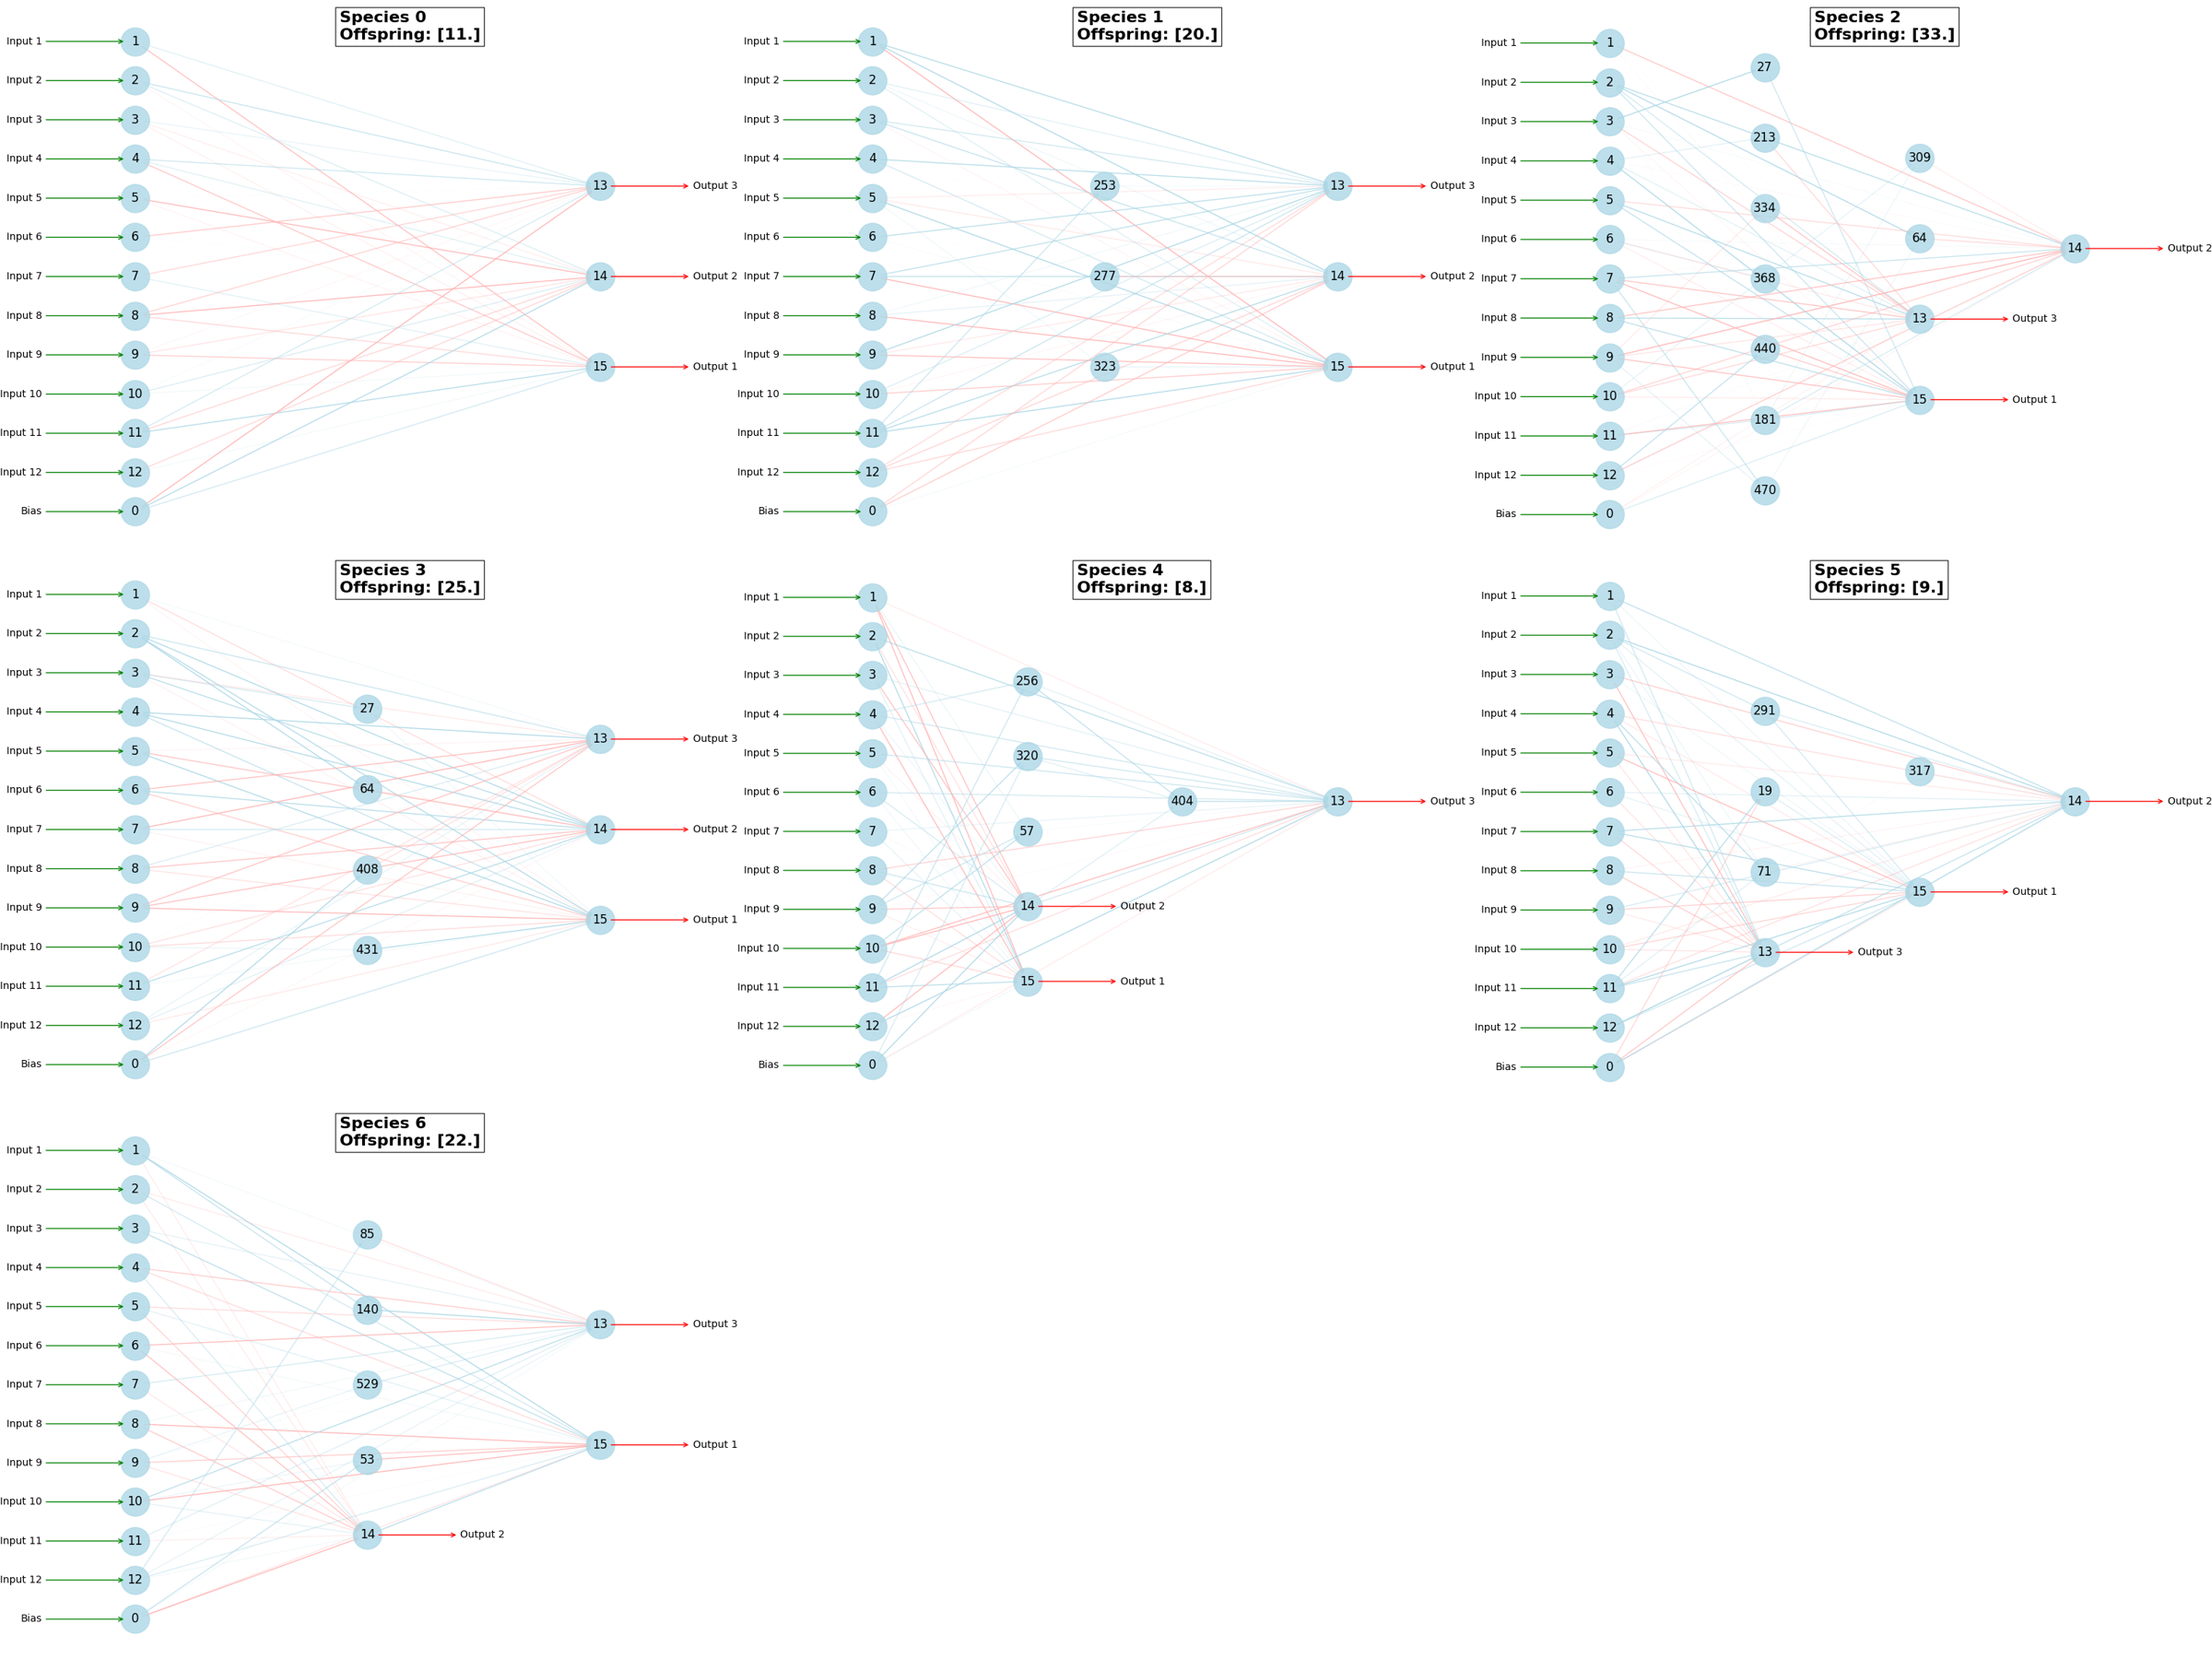

In [11]:
pop_frames[29]

In [11]:
pop_frames[1].save("Neatspecies.gif", save_all=True, append_images=pop_frames[2:], duration=100, loop=0) # save frames to gif

#### Mutation TestBed 

In [2]:
from fineNeat import viewInd, fig2img, Ind, check_sparse_issue, draw_img
import matplotlib.pyplot as plt 
from tqdm import tqdm 
import numpy as np 
ind = Ind.from_shapes([[12, 3]])
ind.express()
frames = []

# Connection Limit & Layer Limit 

for i in tqdm(range(200)):
    child, _ = ind.mutate(p=hyp)    
    if child.express():
        img = draw_img(child)
        frames.append(img)
        ind = child
    else: 
        print("Failed to express child")

frames[0].save("DynamicSparse.gif", save_all=True, append_images=frames[1:], duration=100, loop=0) # save frames to gif

100%|██████████| 200/200 [00:55<00:00,  3.62it/s]


In [7]:
# hyp['prob_mutConn']
hyp['ann_mutSigma']

0.2

In [3]:
frames[0].save("addSparseNode.gif", save_all=True, append_images=frames[1:], duration=100, loop=0) # save frames to gif

#### Population TestBed 

In [8]:
# Test population 
from fineNeat import Ind 
import gym

env = gym.make("SlimeVolley-v0")

population_size = 20
population = [Ind.from_shapes([(game.input_size, 5), (5, game.output_size)]) for _ in range(population_size)]